<a href="https://colab.research.google.com/github/B-Lina/FundamentosRedesNeuronales/blob/main/Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import layers, models,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import math

# ---- Parametros -------
num_entrada = (200,200,3)
num_categorias = 8
batch_size = 32
epocas_Clasificador = 40

"""#**Cargar las imagenes**

Se dividen en conjunto de entrenamiento (70%), conjunto de prueba (30%) y conjunto de evaluacion (30%)
"""

direccion = '/content/drive/MyDrive/Animales'

normalizarImagenes = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,       # Rotación aleatoria hasta 20 grados
    width_shift_range=0.2,   # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    shear_range=0.2,         # Cizallamiento aleatorio
    zoom_range=0.2,          # Zoom aleatorio
    horizontal_flip=True,    # Volteo horizontal aleatorio
    fill_mode='nearest'      # Estrategia para rellenar píxeles nuevos después de una transformación

)
conjunto_Entranamiento = normalizarImagenes.flow_from_directory(
    direccion,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

pool_Validacion_Prueba = normalizarImagenes.flow_from_directory(
    direccion,
    target_size=(200, 200),
    batch_size=batch_size, # Usamos el batch_size normal
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)
total_entrenamiento = conjunto_Entranamiento.samples + pool_Validacion_Prueba.samples
totalValidacion = pool_Validacion_Prueba.samples
num_muestras_15_porciento = math.ceil(totalValidacion / 2)

pasos_para_15_porciento = math.ceil(num_muestras_15_porciento / batch_size)

validation_steps_per_epoch = pasos_para_15_porciento

test_steps = pasos_para_15_porciento

#print(f"Total de imagenes : {total_entrenamiento}")
#print(f"Total de muestras en el Pool Validación/Prueba (30%): {totalValidacion}")

"""# **Modelo Clasificador de Imagenes**"""

def crear_Clasificador():

  modelo = models.Sequential([

      layers.Conv2D(32, kernel_size=(3,3),
                    padding='same', strides=(2,2), activation='relu',
                    input_shape=num_entrada),
      layers.MaxPooling2D(pool_size=(2,2),strides = (1,1),
                          padding='same'),


      layers.Conv2D(64, kernel_size=(3,3),
                    padding='same', strides=(2,2), activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2),strides = (1,1),
                          padding='same'),


      layers.Conv2D(128, kernel_size=(3,3),
                    padding='same', strides=(2,2), activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2),strides = (1,1),
                          padding='same'),
      layers.Dropout(0.4),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(32, activation='relu'),
      layers.Dropout(0.3),

      layers.Dense(num_categorias,activation='softmax')
  ])
  return modelo

"""## Ejecucción y Pruebas"""

modelo_Clasificador= crear_Clasificador()

modelo_Clasificador.compile(optimizer=Adam(learning_rate=1e-4),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])

historia_Clasificador = modelo_Clasificador.fit(
    conjunto_Entranamiento,
    epochs = epocas_Clasificador,
    validation_data=pool_Validacion_Prueba,
    validation_steps = validation_steps_per_epoch
)

"""##Pruebas del modelo"""

pool_Validacion_Prueba.reset()

iterator_for_skipping = iter(pool_Validacion_Prueba)


for _ in range(validation_steps_per_epoch):
    next(iterator_for_skipping)


print("\n--- EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA (TEST) ---")
loss_test, accuracy_test = modelo_Clasificador.evaluate(
    iterator_for_skipping,
    steps=test_steps
)

print(f"\nResultados Finales:")
print(f"Pérdida en el conjunto de Prueba (Test): {loss_test:.4f}")
print(f"Precisión en el conjunto de Prueba (Test): {accuracy_test*100:.2f}%")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1098 images belonging to 8 classes.
Found 469 images belonging to 8 classes.
Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1395 - loss: 2.0906 - val_accuracy: 0.2422 - val_loss: 2.0742
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1312 - loss: 2.0761 - val_accuracy: 0.2344 - val_loss: 2.0790
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1514 - loss: 2.0649 - val_accuracy: 0.2852 - val_loss: 2.0344
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2039 - loss: 2.0413 - val_accuracy: 0.3555 - val_loss: 1.9866
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.2251 - loss: 2.0182 - val_accuracy: 0.4414 - val_loss: 1.9441
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.2207 - loss: 2.0161 - val_accuracy: 0.3828 - val_loss: 1.9387
Epoch 7/40
35/35 ━━━━━━━━━━━━━━

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 809ms/step
Total de muestras en el conjunto de prueba: 213
Clasificaciones correctas: 95
Clasificaciones incorrectas: 118


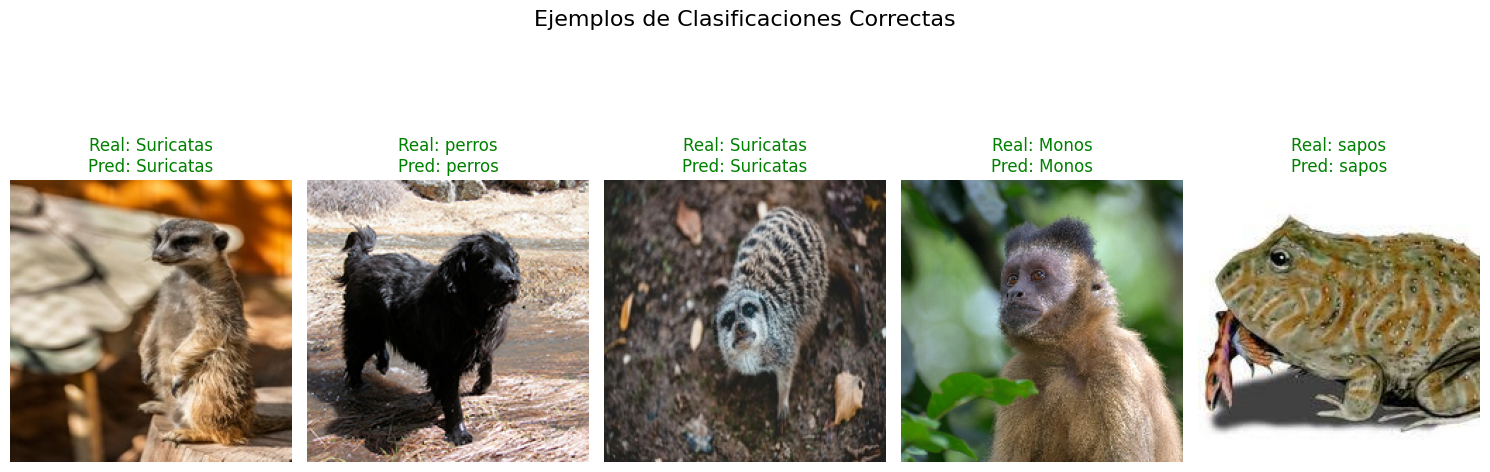

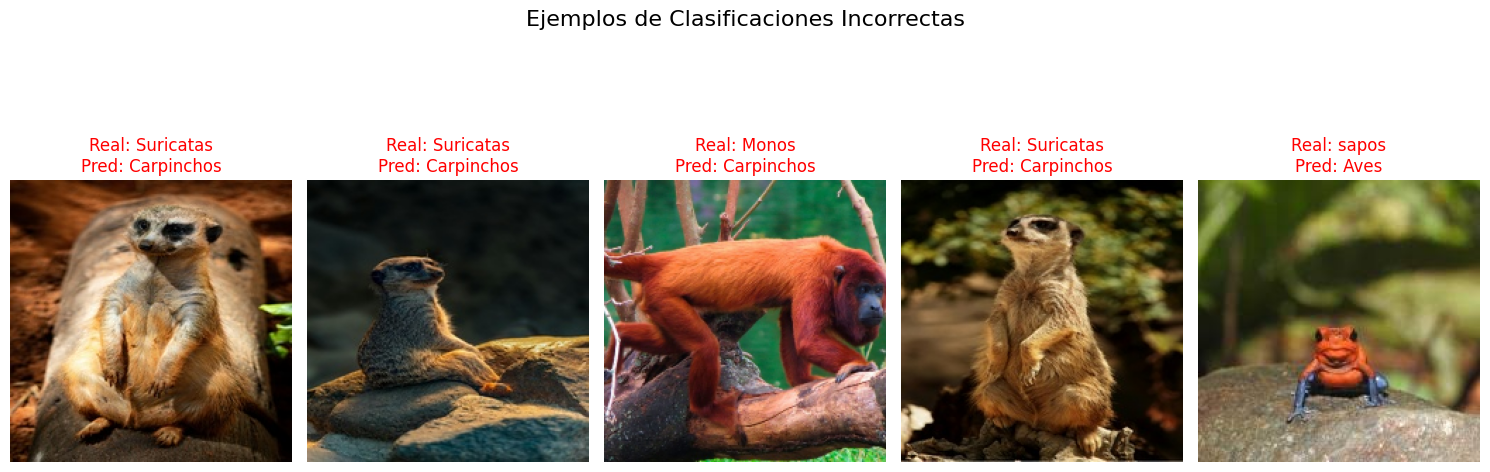

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

class_indices = conjunto_Entranamiento.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
class_names = [idx_to_class[i] for i in range(len(idx_to_class))]

pool_Validacion_Prueba.reset()

true_labels_full_val_test = pool_Validacion_Prueba.classes

predictions_full_val_test = modelo_Clasificador.predict(pool_Validacion_Prueba, steps=len(pool_Validacion_Prueba), verbose=1)
predicted_classes_full_val_test = np.argmax(predictions_full_val_test, axis=1)


validation_samples_count = validation_steps_per_epoch * batch_size
start_test_idx = validation_samples_count
end_test_idx = min(start_test_idx + (test_steps * batch_size), totalValidacion)


test_true_labels = true_labels_full_val_test[start_test_idx:end_test_idx]
test_predicted_classes = predicted_classes_full_val_test[start_test_idx:end_test_idx]
test_filenames = pool_Validacion_Prueba.filenames[start_test_idx:end_test_idx]

correct_indices = np.where(test_predicted_classes == test_true_labels)[0]
incorrect_indices = np.where(test_predicted_classes != test_true_labels)[0]

print(f"Total de muestras en el conjunto de prueba: {len(test_true_labels)}")
print(f"Clasificaciones correctas: {len(correct_indices)}")
print(f"Clasificaciones incorrectas: {len(incorrect_indices)}")

def plot_predictions(indices, title, num_images=5):
    if len(indices) == 0:
        print(f"No hay imágenes para mostrar en '{title}'.")
        return

    display_indices = np.random.choice(indices, min(len(indices), num_images), replace=False)

    plt.figure(figsize=(15, 6))
    plt.suptitle(title, fontsize=16)

    for i, idx in enumerate(display_indices):
        img_path = os.path.join(direccion, test_filenames[idx])
        true_label = class_names[test_true_labels[idx]]
        predicted_label = class_names[test_predicted_classes[idx]]

        plt.subplot(1, num_images, i + 1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f"Real: {true_label}\nPred: {predicted_label}", color='green' if true_label == predicted_label else 'red')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_predictions(correct_indices, "Ejemplos de Clasificaciones Correctas", num_images=5)

plot_predictions(incorrect_indices, "Ejemplos de Clasificaciones Incorrectas", num_images=5)
